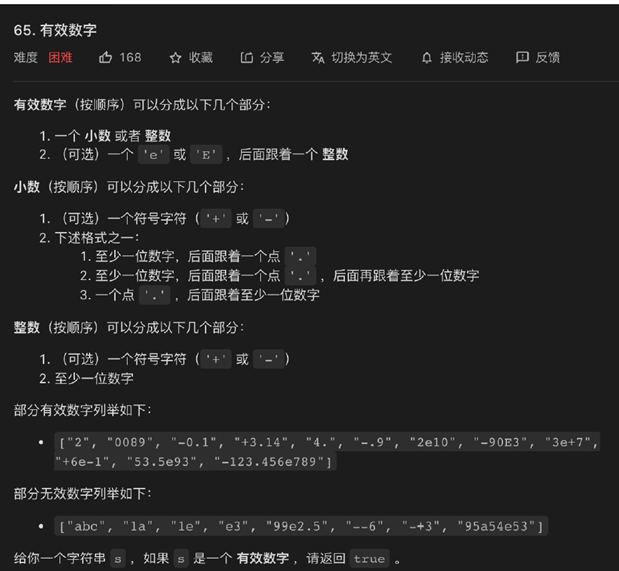


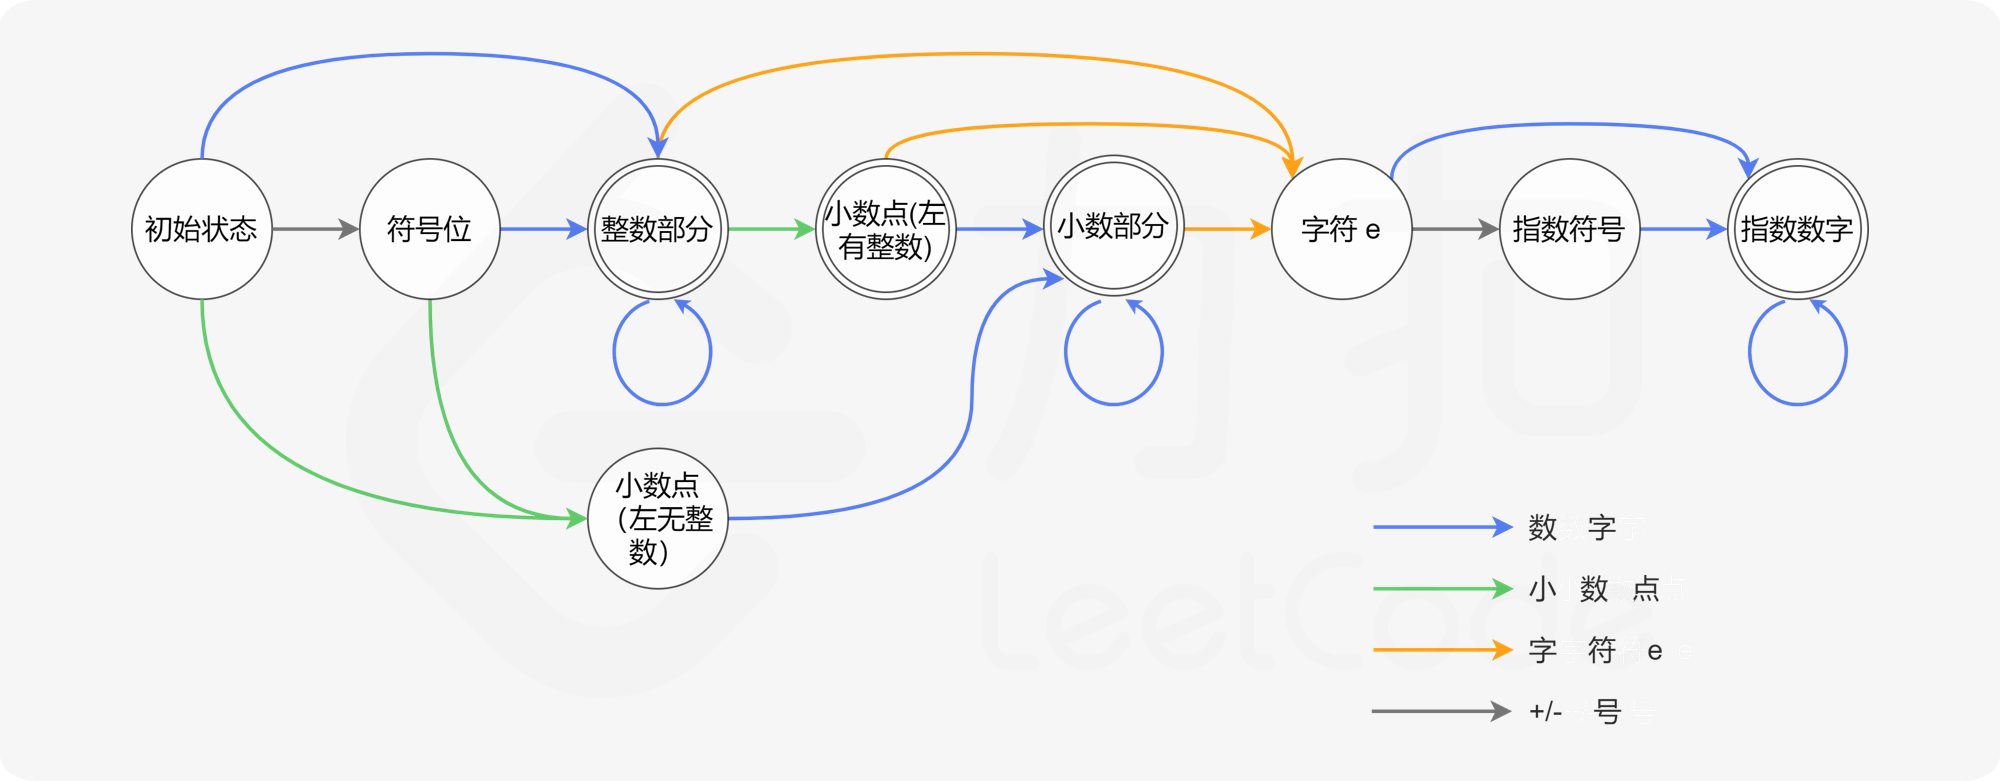

In [1]:
from enum import Enum

In [2]:
State=Enum('state',['state_start','state_int_sign','state_integer','state_point_with_left_integer',
                    'state_point_without_left_integer','state_point_integer','state_exp',
                    'state_exp_sign','state_exp_integer','state_end'])

In [3]:
CharType=Enum('chartype',['char_integer','char_exp','char_sign','char_point','char_illegal'])

In [4]:
Transfer={State.state_start:{CharType.char_sign:State.state_int_sign,
                             CharType.char_point:State.state_point_without_left_integer,
                             CharType.char_integer:State.state_integer},
         State.state_int_sign:{CharType.char_point:State.state_point_without_left_integer,
                              CharType.char_integer:State.state_integer},
         State.state_point_without_left_integer:{CharType.char_integer:State.state_point_integer},
         State.state_integer:{CharType.char_integer:State.state_integer,
                             CharType.char_point:State.state_point_with_left_integer,
                             CharType.char_exp:State.state_exp},
         State.state_point_with_left_integer:{CharType.char_exp:State.state_exp,CharType.char_integer:State.state_point_integer},
         State.state_point_integer:{CharType.char_integer:State.state_point_integer,
                                   CharType.char_exp:State.state_exp},
         State.state_exp:{CharType.char_sign:State.state_exp_sign,CharType.char_integer:State.state_exp_integer},
         State.state_exp_sign:{CharType.char_integer:State.state_exp_integer},
         State.state_exp_integer:{CharType.char_integer:State.state_exp_integer}}

In [5]:
def recognize_char(char):
    if char.isdigit():
        return CharType.char_integer
    elif char.lower()=='e':
        return CharType.char_exp
    elif char in ['+','-']:
        return CharType.char_sign
    elif char=='.':
        return CharType.char_point
    else:
        return CharType.char_illegal

In [6]:
test_string='-32.58E+10'
state=State.state_start
for char in test_string:
    char_type=recognize_char(char)
    if char_type not in Transfer[state]:
        print('{} is not a formated number'.format(test_string))
    state=Transfer[state][char_type]
if state not in [State.state_integer,State.state_point_with_left_integer,State.state_point_integer,State.state_exp_integer,State.state_end]:
    print('{} is not a formated number'.format(test_string))
else:
    print('{} is a formated number'.format(test_string))

-32.58E+10 is a formated number


In [7]:
class string_isdigit(object):
    def __init__(self,):
        self.State=Enum('state',['state_start','state_int_sign','state_integer','state_point_with_left_integer',
                    'state_point_without_left_integer','state_point_integer','state_exp',
                    'state_exp_sign','state_exp_integer','state_end'])
        self.CharType=Enum('chartype',['char_integer','char_exp','char_sign','char_point','char_illegal'])
        self.Transfer={self.State.state_start:{self.CharType.char_sign:self.State.state_int_sign,
                             self.CharType.char_point:self.State.state_point_without_left_integer,
                             self.CharType.char_integer:self.State.state_integer},
         self.State.state_int_sign:{self.CharType.char_point:self.State.state_point_without_left_integer,
                              self.CharType.char_integer:self.State.state_integer},
         self.State.state_point_without_left_integer:{self.CharType.char_integer:self.State.state_point_integer},
         self.State.state_integer:{self.CharType.char_integer:self.State.state_integer,
                             self.CharType.char_point:self.State.state_point_with_left_integer,
                             self.CharType.char_exp:self.State.state_exp},
         self.State.state_point_with_left_integer:{self.CharType.char_exp:self.State.state_exp,self.CharType.char_integer:self.State.state_point_integer},
         self.State.state_point_integer:{self.CharType.char_integer:self.State.state_point_integer,
                                   self.CharType.char_exp:self.State.state_exp},
         self.State.state_exp:{self.CharType.char_sign:self.State.state_exp_sign,self.CharType.char_integer:self.State.state_exp_integer},
         self.State.state_exp_sign:{self.CharType.char_integer:self.State.state_exp_integer},
         self.State.state_exp_integer:{self.CharType.char_integer:self.State.state_exp_integer}}
    def recognize_char(self,char):
        if char.isdigit():
            return self.CharType.char_integer
        elif char.lower()=='e':
            return self.CharType.char_exp
        elif char in ['+','-']:
            return self.CharType.char_sign
        elif char=='.':
            return self.CharType.char_point
        else:
            return self.CharType.char_illegal
    def recognize_number(self,string):
        state=self.State.state_start
        for char in string:
            char_type=self.recognize_char(char)
            if char_type not in self.Transfer[state]:
                return False
            state=self.Transfer[state][char_type]
        return state in [self.State.state_integer,self.State.state_point_with_left_integer,self.State.state_point_integer,self.State.state_exp_integer,self.State.state_end]

In [8]:
string_recognition=string_isdigit()
test_strings=['-32.58E+10','-.5','5.','E5','1E+5-5','3..5','1e5.5']
for string in test_strings:
    print('{}_isdigit?:{}'.format(string,string_recognition.recognize_number(string)))

-32.58E+10_isdigit?:True
-.5_isdigit?:True
5._isdigit?:True
E5_isdigit?:False
1E+5-5_isdigit?:False
3..5_isdigit?:False
1e5.5_isdigit?:False


## Effective number recognition of string with FSM
You are going to determine whether the string is a valid number, this is actually a typical application of the principle of FSM(finite state machine), you should define all possible states and their transition paths，one type of char and one state can get you through next definite state, you will analyze the string char by char util you get the final state, if the final state is in all acceptable states, then the string is considered to be a valid number.  
Examples for valid number:  
["2", "0089", "-0.1", "+3.14", "4.", "-.9", "2e10", "-90E3", "3e+7", "+6e-1", "53.5e93", "-123.456e789"]  
Examples for invalid number:  
["abc", "1a", "1e", "e3", "99e2.5", "--6", "-+3", "95a54e53"]  
Scheduled transfering paths between different states:  
![transfering_paths](https://raw.github.com/huakeda1/Basic-algorithm-and-framework-study-for-AI/master/valid_number_recognition_with_fsm/associated_pngs/transfering_paths.png)  
This task is from [LeetCode](https://leetcode-cn.com/problems/valid-number),you can get more solution from this link.